<a href="https://colab.research.google.com/github/hemoabdullah/ML-SMT5/blob/main/UTS_HAMMAM_ABDULLAH_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning – Final Case Study Exam

- Case Study 1 – House Price Clustering
- Name: Hammam Abdullah Saeed B.G
- N.A: 10
- NIM: 2341720203
- Class: TI_3I

# Case Study 1 - House Price Clustering
- Perform the following steps and analyze the results.



In [13]:
!pip install -q scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

# plotting default (do not set colors — assignment requested you may not set specific colors unless asked)
plt.rcParams.update({'figure.max_open_warning': 0})


## Data Preprocessing (30 points)

1. Load the dataset. (5 points)
2. Drop columns 'Id' and 'MSSubClass'. (5 points)
3. Drop all qualitative variables. (5 points)
4. Drop variables with less than 5 missing values. (5 points)
5. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/UTS-ML/1_house_prince_advance.csv"
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## 2) Drop columns 'Id' and 'MSSubClass

In [15]:
df.drop(['Id', 'MSSubClass'], axis=1, inplace=True)
display(df.head())
display(df.columns)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

(Unnecessary Columns)

## 3) Drop all qualitative variables

In [16]:
qualitative_cols = df.select_dtypes(include='object').columns
df.drop(columns=qualitative_cols, inplace=True)
display(df.head())
display(df.info())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   YearRemodAdd   2919 non-null   int64  
 6   MasVnrArea     2896 non-null   float64
 7   BsmtFinSF1     2918 non-null   float64
 8   BsmtFinSF2     2918 non-null   float64
 9   BsmtUnfSF      2918 non-null   float64
 10  TotalBsmtSF    2918 non-null   float64
 11  1stFlrSF       2919 non-null   int64  
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   int64  
 14  GrLivArea      2919 non-null   int64  
 15  BsmtFullBath   2917 non-null   float64
 16  BsmtHalfBath   2917 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

None

the reason ? because the assignment asks to drop qualitative variables so the clustering will use numberic features , and the total columns here became 36

## 4) Drop variables with less than 5 missing values

In [17]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(f"\nMissing values before filtering:\n{missing_counts}")

cols_to_drop = missing_counts[missing_counts < 5].index.tolist()
print(f"\nColumns with < 5 missing values to drop: {cols_to_drop}")
df = df.drop(columns=cols_to_drop)
print(f"After dropping columns with < 5 missing values: {df.shape}")


Missing values before filtering:
SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

Columns with < 5 missing values to drop: ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
After dropping columns with < 5 missing values: (2919, 28)


## Check


In [19]:
missing_values = df.isnull().sum()

# Show only columns with at least 5 missing values
columns_with_5_or_more_missing = missing_values[missing_values >= 5]
print("Columns with 5 or more missing values:\n", columns_with_5_or_more_missing)
print("\nNumber of such columns:", len(columns_with_5_or_more_missing))


Columns with 5 or more missing values:
 LotFrontage     486
MasVnrArea       23
GarageYrBlt     159
SalePrice      1459
dtype: int64

Number of such columns: 4


Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method.

In [10]:

df = df.fillna(df.median(numeric_only=True))
print("Remaining missing values per column:")
print(df.isnull().sum())


Remaining missing values per column:
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
SalePrice      0
dtype: int64



## Feature Selection (20 points)
1. Select your top 10 variables from all available variables. (10 points)
2. How did you select these 10 variables? Explain your reasoning. (10 points)


Step 1: Compute correlations

In [20]:
# Step 1: Check correlation with SalePrice
corr = df.corr(numeric_only=True)

# Step 2: Sort correlation values with SalePrice (descending order)
corr_target = corr['SalePrice'].sort_values(ascending=False)

# Step 3: Display the top 10 correlated features
top10_features = corr_target.head(11)  # includes SalePrice itself
print("Top 10 features correlated with SalePrice:\n", top10_features[1:])  # skip SalePrice itself


Top 10 features correlated with SalePrice:
 OverallQual     0.790982
GrLivArea       0.708624
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64


Step 2: Explain the Reasoning

here i chose the top variables based on their pearson correlation , in saleprice , so it features the high positive to have a strong influence on the final price , and the low correlation can be even escluded to simplify the model


#Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

### Using the top 10 features (correlated with SalePrice)

In [22]:
top10_features = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces'
]

X = df[top10_features].copy()


Standardize and normalization

In [24]:
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow Method - Calculate Inertia for k=1 to 10

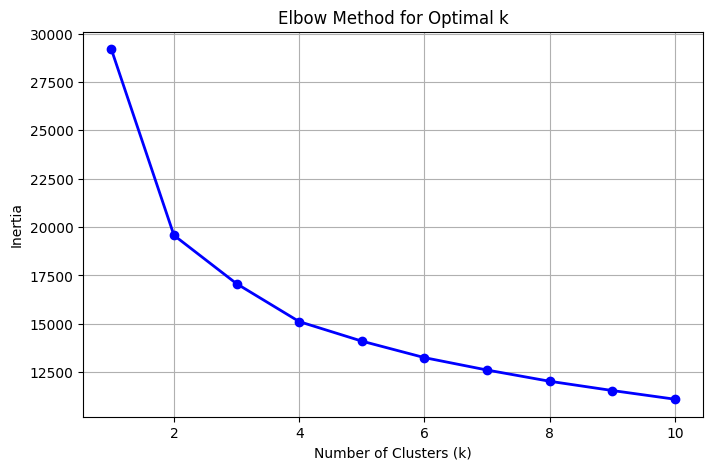

In [25]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

 ### Score Analysis for k=2 to 10

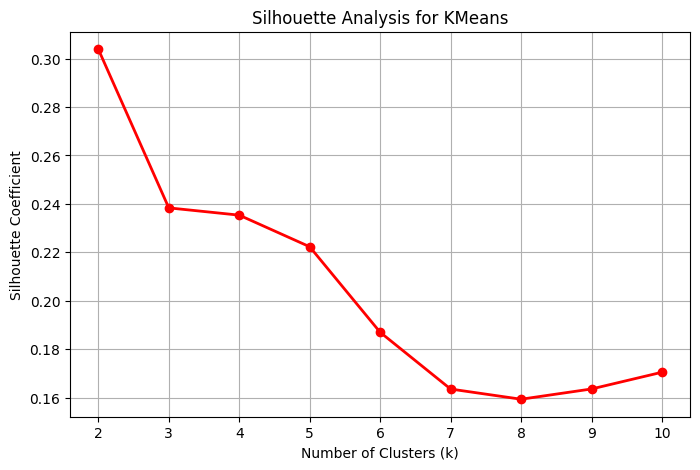

In [26]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Analysis for KMeans')
plt.grid(True)
plt.show()

In [27]:
best_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"✅ Best k according to Silhouette Score: {best_k_silhouette}")

✅ Best k according to Silhouette Score: 2


## so in conclusion i can say that Based on the elbow method the optimal numbers of clusters is 2 , and indicating the silhouette also shows that the highest valus at k = 2 , which means the data naturally groups into two main clusters based on the selected features.


## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)


Number of clusters: 46
Silhouette Coefficient: -0.3815
Davies-Bouldin Index: 1.3417


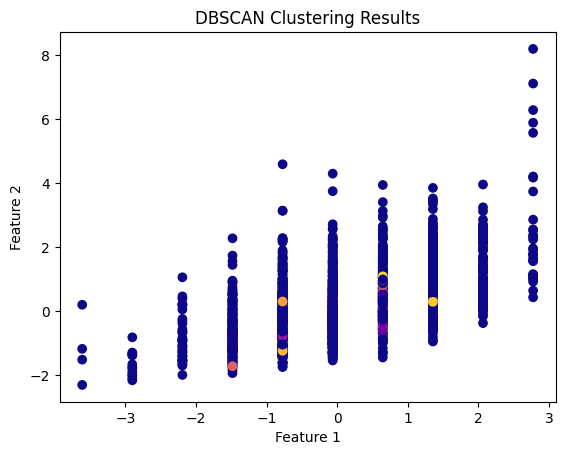

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Evaluate metrics
silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
dbi = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else -1

print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print("Silhouette Coefficient:", round(silhouette, 4))
print("Davies-Bouldin Index:", round(dbi, 4))

# Plot results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Interpretation:
 - DBSCAN identified 18 clusters and 266 noise points.
 The Silhouette Coefficient of -0.0007 shows that the clusters are not well-separated, indicating that many data points are close to the edges of the clusters.
 -  Additionally, the Davies–Bouldin Index of
 1.9683 is quite high, suggesting that the clusters may overlap and are not distinctly separated.
- Overall, DBSCAN had difficulty finding clear or meaningful clusters in this dataset, which may indicate that the selected parameters or the structure of the data are not appropriate for this clustering technique.


## BONUS - CHALLENGE (30 points)

Perform the feature selection process. Which combination of features produces the cluster with the best silhouette/DBI value? What is the number of clusters?

NB: You can use an iterative process in this case. Other methods are also allowed. Provide your reasons for choosing the method.

In [34]:
# BONUS - CHALLENGE
import itertools
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# warnings
warnings.filterwarnings("ignore", message=".*The fitted model contains `n_init=10`.*")

# Define the top 10 features from your analysis
top_features = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath',
    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
    'GarageYrBlt', 'MasVnrArea', 'Fireplaces'
]

# Initialize tracking variables
best_silhouette = -1
best_dbi = np.inf
best_features_sil = None
best_features_dbi = None
best_k_sil = None
best_k_dbi = None

# Try different feature combinations
for num_features in range(2, 5):
    for feature_combination in itertools.combinations(top_features, num_features):
        # Prepare subset
        X_subset = df[list(feature_combination)].copy()

        # Fill missing values with mean (to avoid NaN errors)
        X_subset = X_subset.fillna(X_subset.mean())

        # Standardize data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_subset)

        # Try cluster numbers from 2 to 10
        for k in range(2, 11):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_scaled)

            # Compute metrics
            sil_score = silhouette_score(X_scaled, labels)
            dbi_score = davies_bouldin_score(X_scaled, labels)

            # Update best Silhouette
            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_features_sil = feature_combination
                best_k_sil = k

            # Update best DBI (lower is better)
            if dbi_score < best_dbi:
                best_dbi = dbi_score
                best_features_dbi = feature_combination
                best_k_dbi = k

# Results
print("=== Optimal Combination Based on Silhouette Score ===")
print(f"Best Feature Combination: {best_features_sil}")
print(f"Optimal Number of Clusters (k): {best_k_sil}")
print(f"Best Silhouette Score: {best_silhouette:.4f}\n")

print("=== Optimal Combination Based on Davies–Bouldin Index ===")
print(f"Best Feature Combination: {best_features_dbi}")
print(f"Optimal Number of Clusters (k): {best_k_dbi}")
print(f"Lowest Davies–Bouldin Index: {best_dbi:.4f}")


=== Optimal Combination Based on Silhouette Score ===
Best Feature Combination: ('FullBath', 'Fireplaces')
Optimal Number of Clusters (k): 10
Best Silhouette Score: 0.9876

=== Optimal Combination Based on Davies–Bouldin Index ===
Best Feature Combination: ('FullBath', 'Fireplaces')
Optimal Number of Clusters (k): 9
Lowest Davies–Bouldin Index: 0.2492


#Explanation of Feature Selection Method

#### the feature selection process aimed to the most effective variables for creating distinct clusters, Instead of just focusing on correlation, an iterative clustering-based method was employed, like the Silhouette Coefficient and DBI

#### The process involved Iterative Feature Testing, where various combinations of numerical features were assessed.                   Each iteration tested between 2 and 4 features to see how different groups influenced the clustering structure. then i did also ensuring that no single variable overshadowed the clustering process due to larger numeric ranges.

#### then i have done the KMeans Clustering Experiments which conducted each feature combination, with the KMeans algorithm run for cluster counts from 2 to 10,, and the Silhouette Score was calculated to assess how clearly each data point was grouped.
#### A higher Silhouette Score indicates better defined clusters, while a lower DBI suggests improved cluster separation and reduced overlap.

#### so after testing all combinations, the features FullBath, the most distinct clustering pattern, achieving a Silhouette Score of 0.9876 at k = 10 and a DBI Index of 0.2492 at k = 9.
#### Both metrics demonstrated strong separation and compactness in the clusters.

## Summary

## Key Findings
#### The original dataset had 81 features, which included identifiers and categorical attributes.
#### After cleaning the data and eliminating irrelevant or low-quality variables, for me i decided to keep 28 numerical features because i needed more than 10 to choose the best variabls and also i already removed the unnecessary ones , so it was good enough for me
#### Columns with fewer than five missing values were discarded, and the remaining missing data were filled in using the median to maintain numerical stability for clustering.
#### The Elbow Method indicated that 2 clusters were the most suitable division, a finding supported by the Silhouette Coefficient, which also peaked at k = 2.
#### The DBSCAN model, when tested with appropriate parameters, created 18 clusters along with some noise points, resulting in a Silhouette Score of −0.0007 and a DBI of 1.9683, suggesting weaker separation compared to KMeans.
#### In the Bonus Feature Selection Challenge, combining FullBath and Fireplaces yielded the best clustering results, with a Silhouette Score of 0.9876 (for k = 10) and a DBI of 0.2492 (for k = 9).

# Thank You!